In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
data = pd.read_csv("clean_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      41370 non-null  int64  
 1   space      41370 non-null  float64
 2   room       41370 non-null  int64  
 3   bedroom    41370 non-null  int64  
 4   furniture  41370 non-null  int64  
 5   latitude   41370 non-null  float64
 6   longitude  41370 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.2 MB


In [14]:
num_data = data._get_numeric_data()
num_data.columns

Index(['price', 'space', 'room', 'bedroom', 'furniture', 'latitude',
       'longitude'],
      dtype='object')

In [15]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_data.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
price,41370.0,0.0,3.741502e+09,90439.991540,63000.000000,709542.686111,5.034508e+11,1000.000000,16000.000000,26000.000000,31100.000000,43000.000000,63000.000000,100000.000000,160000.000000,215000.000000,371550.000000,1.000000e+08
space,41370.0,0.0,3.561413e+06,86.086842,73.600000,52.724506,2.779874e+03,1.000000,27.600000,36.000000,42.000000,55.000000,73.600000,103.000000,143.000000,173.500500,255.000000,2.700000e+03
room,41370.0,0.0,1.212160e+05,2.930046,3.000000,2.649397,7.019303e+00,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000,5.000000,6.000000,3.000000e+02
bedroom,41370.0,0.0,7.374900e+04,1.782669,2.000000,0.853376,7.282500e-01,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000e+00
furniture,41370.0,0.0,1.887300e+04,0.456200,0.000000,0.498084,2.480876e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
latitude,41370.0,0.0,1.726253e+06,41.727177,41.722635,0.088957,7.913416e-03,40.359141,41.560813,41.650950,41.672191,41.705586,41.722635,41.732834,41.787462,41.793611,42.141614,4.621806e+01
longitude,41370.0,0.0,1.840769e+06,44.495264,44.769620,0.889270,7.908015e-01,38.829869,41.613705,41.636009,44.482892,44.742562,44.769620,44.798019,44.836876,44.872189,44.984059,4.723828e+01


In [16]:
sns.boxplot(x=num_data['Price (USD)'])

KeyError: 'Price (USD)'

<AxesSubplot:xlabel='Space (m^2)'>

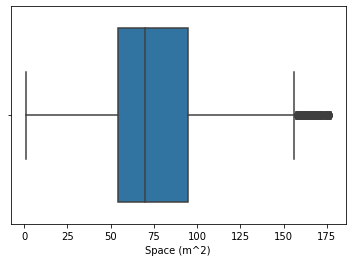

In [ ]:
sns.boxplot(x=num_data['Space (m^2)'])

<AxesSubplot:xlabel='Number of Rooms'>

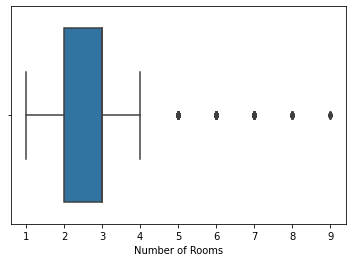

In [ ]:
sns.boxplot(x=num_data['Number of Rooms'])

<AxesSubplot:xlabel='Normalized Latitude'>

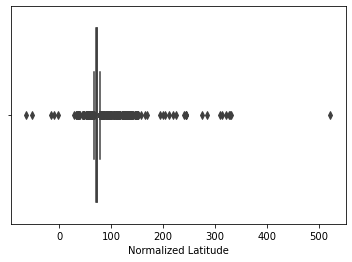

In [ ]:
sns.boxplot(x=num_data["Normalized Latitude"])

<AxesSubplot:xlabel='Normalized Longitude'>

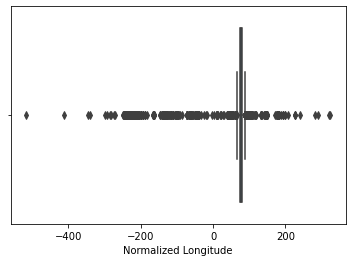

In [ ]:
sns.boxplot(x=num_data["Normalized Longitude"])

<AxesSubplot:>

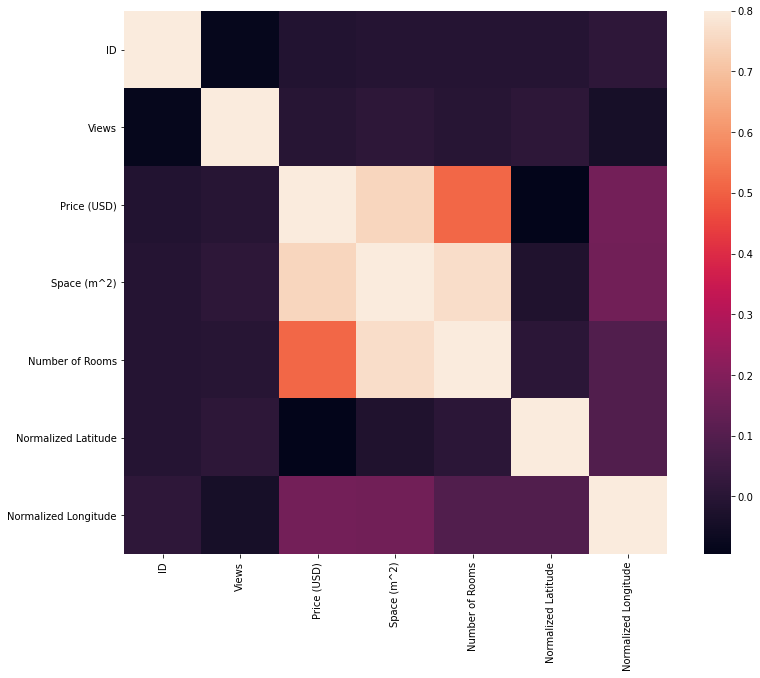

In [ ]:
num_corr = num_data.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(num_corr,vmax =.8 ,square = True)